<a href="https://colab.research.google.com/github/gopaltiwari04/LLPS_vs_nonLLPS/blob/main/LLPS_vs_non_LLPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the Github repositories

In [1]:
!git clone https://github.com/Zhou-Yetong/Opt_PredLLPS.git

Cloning into 'Opt_PredLLPS'...
remote: Enumerating objects: 2559, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 2559 (delta 16), reused 0 (delta 0), pack-reused 2532 (from 1)
Receiving objects: 100% (2559/2559), 77.39 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (419/419), done.


In [2]:
!ls Opt_PredLLPS/datasets
!pip install biopython

Ind_Test_II_N.fasta  LLPS.fasta       PdPS_N.fasta	 SaPS_N.fasta
Ind_Test_II_P.fasta  LLPS_Part.fasta  PdPS_P.fasta	 SaPS_P.fasta
Ind_Test_I_N.fasta   LLPS_Self.fasta  PdPS_Test_N.fasta  SaPS_Test_N.fasta
Ind_Test_I_P.fasta   non_LLPS.fasta   PdPS_Test_P.fasta  SaPS_Test_P.fasta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.7 MB/s eta 0:00:00


In [3]:
!git clone https://github.com/Zhou-Yetong/Opt_PredLLPS.git


fatal: destination path 'Opt_PredLLPS' already exists and is not an empty directory.


In [4]:
!ls Opt_PredLLPS/datasets


Ind_Test_II_N.fasta  LLPS.fasta       PdPS_N.fasta	 SaPS_N.fasta
Ind_Test_II_P.fasta  LLPS_Part.fasta  PdPS_P.fasta	 SaPS_P.fasta
Ind_Test_I_N.fasta   LLPS_Self.fasta  PdPS_Test_N.fasta  SaPS_Test_N.fasta
Ind_Test_I_P.fasta   non_LLPS.fasta   PdPS_Test_P.fasta  SaPS_Test_P.fasta


Loading LLPS and nonLLPS protein sequences in the environment

In [5]:
from Bio import SeqIO
import pandas as pd

# Load LLPS (positive) sequences
llps_records = list(SeqIO.parse("Opt_PredLLPS/datasets/LLPS.fasta", "fasta"))

# Load non-LLPS (negative) sequences
non_llps_records = list(SeqIO.parse("Opt_PredLLPS/datasets/non_LLPS.fasta", "fasta"))


Create Combined DataFrame of LLPS and Non‑LLPS Sequences


In [6]:
# Convert to DataFrame
llps_df = pd.DataFrame({
    'sequence': [str(rec.seq) for rec in llps_records],
    'label': ['LLPS'] * len(llps_records)
})

non_llps_df = pd.DataFrame({
    'sequence': [str(rec.seq) for rec in non_llps_records],
    'label': ['non-LLPS'] * len(non_llps_records)
})

# Combine both
df = pd.concat([llps_df, non_llps_df], ignore_index=True)
df.sample(5)  # View random 5 rows


,sequence,label
42,MMLGTEGGEGFVVKVRGLPWSCSADEVQRFFSDCKIQNGAQGIRFI...,LLPS
1368,MRDIDSVMRLAPVMPVLVIEDIADAKPIAEALVAGGLNVLEVTLRT...,non-LLPS
302,MSENNEEQHQQQQQQQPVAVETPSAVEAPASADPSSEQSVAVEGNS...,LLPS
1452,MAREVKLTKAGYERLMQQLERERERLQEATKILQELMESSDDYDDS...,non-LLPS
514,MADGVDHIDIYADVGEEFNQEAEYGGHDQIDLYDDVISPSANNGDA...,LLPS


Install Biopython

In [7]:
!pip install biopython


Computing and Appending Protein Physicochemical Features to DataFrame


In [8]:

from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Define amino acid volume (Å^3) and polarity (Grantham scale) dictionaries
aa_volume = {
    'A':  88.6, 'R': 173.4, 'N': 114.1, 'D': 111.1, 'C': 108.5,
    'Q': 143.8, 'E': 138.4, 'G':  60.1, 'H': 153.2, 'I': 166.7,
    'L': 166.7, 'K': 168.6, 'M': 162.9, 'F': 189.9, 'P':  112.7,
    'S':  89.0, 'T':  116.1, 'W': 227.8, 'Y': 193.6, 'V':  140.0
}
aa_polarity = {
    'A':   8.1, 'R':  10.5, 'N':  11.6, 'D':  13.0, 'C':   5.5,
    'Q':  10.5, 'E':  12.3, 'G':   9.0, 'H':  10.4, 'I':   5.2,
    'L':   4.9, 'K':  11.3, 'M':   5.7, 'F':   5.2, 'P':   8.0,
    'S':   9.2, 'T':   8.6, 'W':   5.4, 'Y':   6.2, 'V':   5.9
}

def compute_features(seq):
    """Compute selected features for a protein sequence."""
    seq = seq.upper()
    analysis = ProteinAnalysis(seq)
    # Calculate features
    hydrophobicity = analysis.gravy()
    aromaticity = analysis.aromaticity()
    pI = analysis.isoelectric_point()
    net_charge = analysis.charge_at_pH(7.0)
    # Average side-chain volume and polarity
    vol = sum(aa_volume.get(aa, 0) for aa in seq) / len(seq)
    pol = sum(aa_polarity.get(aa, 0) for aa in seq) / len(seq)
    return pd.Series({
        'hydrophobicity': hydrophobicity,
        'aromaticity':    aromaticity,
        'pI':             pI,
        'net_charge':     net_charge,
        'volume':         vol,
        'polarity':       pol
    })

# Apply to each sequence
features_df = df['sequence'].apply(compute_features)
df = pd.concat([df, features_df], axis=1)
df.head()


,sequence,label,hydrophobicity,aromaticity,pI,net_charge,volume,polarity
0,MNRYLNRQRLYNMEEERNKYRGVMEPMSRMTMDFQGRYMDSQGRMV...,LLPS,-1.531073,0.172316,7.219711,1.206412,141.622316,8.865254
1,MADDEQFSLCWNNFNTNLSAGFHESLCRGDLVDVSLAAEGQIVKAH...,LLPS,-0.676471,0.052941,5.360792,-13.461000,128.677059,8.864902
2,MKRPKILSGKKKSWFCMASVFLLVVAFALSIVSNAMAATGSFDRES...,LLPS,-0.057539,0.058634,4.471774,-49.193444,120.860825,8.510438
3,MKFCLSVALLAVAMVMVNGQFFGAGPFNTAHHSAVSDAAAAHHDAA...,LLPS,-0.317098,0.103627,6.210365,-8.147830,122.208290,8.559067
4,SSATNRVSPTRSVLPANWRQELESLRNGNGSSSAASSAPAPARSSS...,LLPS,-0.753052,0.037559,11.615801,16.474254,117.691549,8.880282


Encoding LLPS vs Non‑LLPS Labels as Binary Values


In [9]:
df['label_enc'] = df['label'].map({'LLPS': 1, 'non-LLPS': 0})


Defining Feature Matrix (X) and Target Vector (y)


In [10]:
X = df[['hydrophobicity','volume','polarity','aromaticity','pI','net_charge']]
y = df['label_enc']


Performing stratified splitting of dataset into training and test sets using hydrophobicity, volume, polarity, aromaticity, pI, and net_charge


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=104, stratify=y)


In [12]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y)  # no random_state


Training a Decision Tree Classifier on hydrophobicity, volume, polarity, aromaticity, pI, and net_charge features


In [13]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=104)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=104)

Evaluating classification performance on test set by computing accuracy, confusion matrix, and detailed report using hydrophobicity, volume, polarity, aromaticity, pI, and net_charge features


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)



# Optional: detailed classification report
print(classification_report(y_test, y_pred, target_names=['non-LLPS','LLPS']))


Accuracy on test set: 0.84
Confusion matrix:
 [[132  28]
 [ 24 136]]
              precision    recall  f1-score   support

    non-LLPS       0.85      0.82      0.84       160
        LLPS       0.83      0.85      0.84       160

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



Searching for optimal random seed by evaluating Decision Tree accuracy on hydrophobicity, volume, polarity, aromaticity, pI, and net_charge features


In [15]:
# we are taking random state defined not varying , this fucrion is just for fidning the highest accuracy state

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_seed = None

for seed in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y)

    clf = DecisionTreeClassifier(random_state=seed)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    if acc > best_accuracy:
        best_accuracy = acc
        best_seed = seed

print(f"Best accuracy: {best_accuracy:.2f} with seed: {best_seed}")



Best accuracy: 0.84 with seed: 104


Visualizing Decision Tree structure using hydrophobicity, volume, polarity, aromaticity, pI, and net_charge features


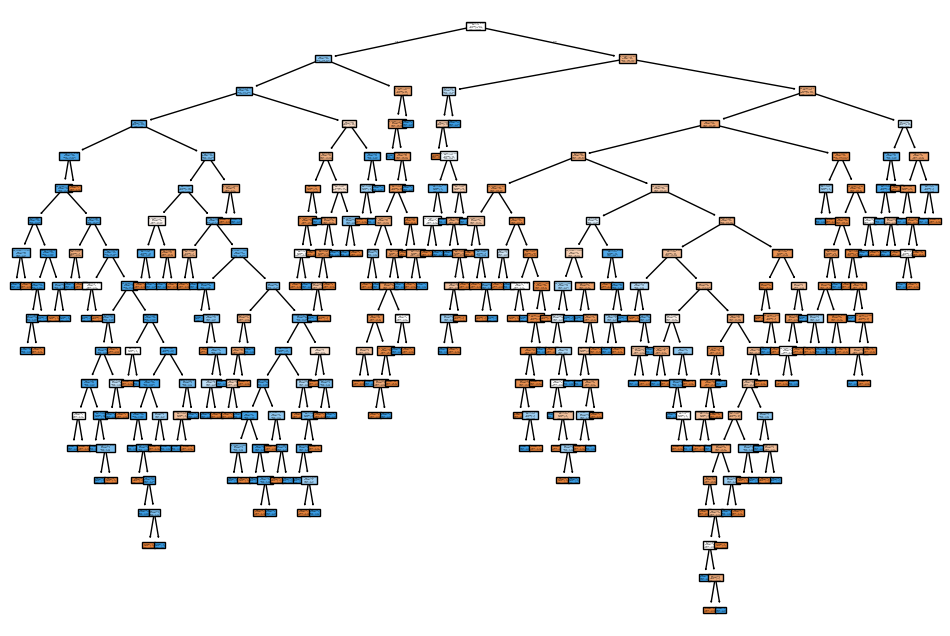

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['non-LLPS','LLPS'], filled=True)
plt.show()


Defining and computing physicochemical features (hydrophobicity, aromaticity, volume, polarity, pI, net\_charge, instability\_index, molecular\_weight) for protein sequences


In [17]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Predefined property scales
aa_volume = {
    'A': 88.6, 'R': 173.4, 'N': 114.1, 'D': 111.1, 'C': 108.5,
    'Q': 143.8, 'E': 138.4, 'G': 60.1, 'H': 153.2, 'I': 166.7,
    'L': 166.7, 'K': 168.6, 'M': 162.9, 'F': 189.9, 'P': 112.7,
    'S': 89.0, 'T': 116.1, 'W': 227.8, 'Y': 193.6, 'V': 140.0
}
aa_polarity = {
    'A': 8.1, 'R': 10.5, 'N': 11.6, 'D': 13.0, 'C': 5.5,
    'Q': 10.5, 'E': 12.3, 'G': 9.0, 'H': 10.4, 'I': 5.2,
    'L': 4.9, 'K': 11.3, 'M': 5.7, 'F': 5.2, 'P': 8.0,
    'S': 9.2, 'T': 8.6, 'W': 5.4, 'Y': 6.2, 'V': 5.9
}

def compute_physicochemical_features(sequence):
    sequence = sequence.upper()
    analysis = ProteinAnalysis(sequence)

    features = {
        'hydrophobicity': analysis.gravy(),
        'aromaticity': analysis.aromaticity(),
        'volume': sum(aa_volume.get(aa, 0) for aa in sequence) / len(sequence),
        'polarity': sum(aa_polarity.get(aa, 0) for aa in sequence) / len(sequence),
        'pI': analysis.isoelectric_point(),
        'net_charge': analysis.charge_at_pH(7.0),
        'instability_index': analysis.instability_index(),
        'molecular_weight': analysis.molecular_weight()
    }
    return features


Applying physicochemical feature extraction to all sequences and aggregating LLPS labels


In [18]:
# Apply feature function to all sequences
feature_dicts = []
labels = []

for _, row in df.iterrows():
    seq = row['sequence']
    label = 1 if row['label'] == 'LLPS' else 0
    try:
        feats = compute_physicochemical_features(seq)
        feature_dicts.append(feats)
        labels.append(label)
    except Exception as e:
        print(f"Skipping sequence due to error: {e}")


Creating DataFrame of computed hydrophobicity, aromaticity, volume, polarity, pI, net\_charge, instability\_index, and molecular\_weight features and appending LLPS labels


In [19]:
features_df = pd.DataFrame(feature_dicts)
features_df['label'] = labels
features_df.head()


,hydrophobicity,aromaticity,volume,polarity,pI,net_charge,instability_index,molecular_weight,label
0,-1.531073,0.172316,141.622316,8.865254,7.219711,1.206412,74.041554,44120.5077,1
1,-0.676471,0.052941,128.677059,8.864902,5.360792,-13.461000,48.740980,55821.9442,1
2,-0.057539,0.058634,120.860825,8.510438,4.471774,-49.193444,17.301753,157998.5580,1
3,-0.317098,0.103627,122.208290,8.559067,6.210365,-8.147830,7.037824,20043.5288,1
4,-0.753052,0.037559,117.691549,8.880282,11.615801,16.474254,100.639906,21718.4258,1


Converting computed hydrophobicity, aromaticity, volume, polarity, pI, net_charge, instability_index, and molecular_weight features into an index‑oriented dictionary


In [20]:
# Dictionary format: {index: {'hydrophobicity': ..., 'volume': ..., ...}, ...}
feature_dictionary = features_df.drop(columns=['label']).to_dict(orient='index')


Analyzing 1596 proteins in the dataset

In [21]:
print(f"Analyzing {len(df)} proteins in the dataset")

Analyzing 1596 proteins in the dataset


Performing PCA (2 components) and LDA (1 component) transformations on hydrophobicity, aromaticity, volume, polarity, pI, net_charge, instability_index, and molecular_weight features


In [22]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = features_df.drop(columns=['label']).values
y = features_df['label'].values

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# FDA (LDA)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)


Generating normalized amino acid composition dictionaries for all sequences using the 20 standard amino acids


In [23]:
import pandas as pd

# Suppose df is already defined and has a column 'sequence'
# Example:
# df = pd.DataFrame({'sequence': ['MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQANL...',
#                                 'GATRAGGATGAGGAGAGAGAGAGTGCTAGCTCCTG...',
#                                 ...],
#                    'label':   ['LLPS', 'non-LLPS', ...]})

# List the 20 standard amino acids in a fixed order
aa_list = ['A','C','D','E','F','G','H','I','K','L',
           'M','N','P','Q','R','S','T','V','W','Y']

def compute_aac_dict(sequence):
    """
    Given a protein sequence string, return a dict of
    normalized frequencies for each of the 20 amino acids.
    """
    seq = sequence.upper()
    length = len(seq)
    # Initialize counts to zero for each amino acid
    counts = {aa: 0 for aa in aa_list}
    # Count occurrences
    for aa in seq:
        if aa in counts:
            counts[aa] += 1
    # Normalize by length to get frequency
    aac = {aa: counts[aa] / length for aa in aa_list}
    return aac

# Build the full dictionary for all rows in df
aac_dict = {}
for idx, row in df.iterrows():
    seq = row['sequence']
    aac_dict[idx] = compute_aac_dict(seq)

# Example: print AAC for the first 3 proteins
for i in range(100):
    print(f"Protein index {i}:")
    print(aac_dict[i])
    print()


Protein index 0:
{'A': 0.005649717514124294, 'C': 0.005649717514124294, 'D': 0.07627118644067797, 'E': 0.03672316384180791, 'F': 0.025423728813559324, 'G': 0.09887005649717515, 'H': 0.08757062146892655, 'I': 0.002824858757062147, 'K': 0.002824858757062147, 'L': 0.00847457627118644, 'M': 0.1384180790960452, 'N': 0.07344632768361582, 'P': 0.0480225988700565, 'Q': 0.059322033898305086, 'R': 0.10734463276836158, 'S': 0.059322033898305086, 'T': 0.005649717514124294, 'V': 0.011299435028248588, 'W': 0.02824858757062147, 'Y': 0.11864406779661017}

Protein index 1:
{'A': 0.08627450980392157, 'C': 0.01568627450980392, 'D': 0.06274509803921569, 'E': 0.050980392156862744, 'F': 0.021568627450980392, 'G': 0.050980392156862744, 'H': 0.023529411764705882, 'I': 0.03725490196078431, 'K': 0.045098039215686274, 'L': 0.056862745098039215, 'M': 0.0196078431372549, 'N': 0.045098039215686274, 'P': 0.049019607843137254, 'Q': 0.10196078431372549, 'R': 0.041176470588235294, 'S': 0.09215686274509804, 'T': 0.10196

Conducting PCA and LDA on frequencies of five randomly selected amino acids and visualizing component projections


Randomly selected amino acids: ['K', 'H', 'A', 'W', 'S']


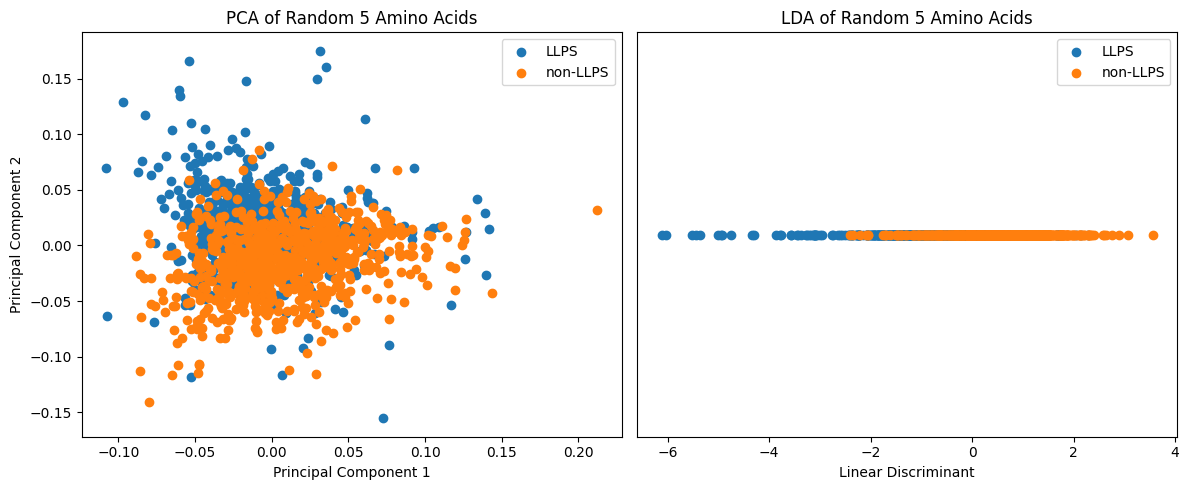

PCA explained variance ratio: [0.37370399 0.32937552]
LDA coefficients: [[  3.47903107  -4.9244489    2.21875485  25.15609575 -34.38638789]]


In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import random

# Assuming df is already defined with 'sequence' and 'label' columns
# Example df:
# df = pd.DataFrame({
#     'sequence': ['MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQANL',
#                  'GATRAGGATGAGGAGAGAGAGAGTGCTAGCTCCTG',
#                  ...],
#     'label': ['LLPS', 'non-LLPS', ...]
# })

# List of 20 standard amino acids
aa_list = ['A','C','D','E','F','G','H','I','K','L',
           'M','N','P','Q','R','S','T','V','W','Y']

def compute_aac_dict(sequence):
    """Compute amino acid composition for a given sequence."""
    seq = sequence.upper()
    length = len(seq)
    counts = {aa: 0 for aa in aa_list}
    for aa in seq:
        if aa in counts:
            counts[aa] += 1
    return {aa: counts[aa]/length for aa in aa_list}

# Compute AAC for all sequences
aac_data = [compute_aac_dict(seq) for seq in df['sequence']]
aac_df = pd.DataFrame(aac_data, index=df.index)

# Randomly select 5 amino acids
random_aas = random.sample(aa_list, 5)
print("Randomly selected amino acids:", random_aas)

# Prepare data for analysis
X = aac_df[random_aas].values
y = df['label'].values

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# LDA (Fisher's Linear Discriminant)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Plotting
plt.figure(figsize=(12, 5))

# PCA plot
plt.subplot(1, 2, 1)
for label in np.unique(y):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Random 5 Amino Acids')
plt.legend()

# LDA plot
plt.subplot(1, 2, 2)
for label in np.unique(y):
    plt.scatter(X_lda[y==label], np.zeros_like(X_lda[y==label]), label=label)
plt.xlabel('Linear Discriminant')
plt.yticks([])
plt.title('LDA of Random 5 Amino Acids')
plt.legend()

plt.tight_layout()
plt.show()

# Print explained variance for PCA
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

# Print LDA coefficients
print("LDA coefficients:", lda.coef_)

Evaluating classification accuracy across all combinations of five amino‑acid composition features using PCA and LDA


Evaluating 15504 combinations...


100%|██████████| 15504/15504 [01:06<00:00, 231.84it/s]



Top 10 performing 5-feature combinations:
1. Features: ('I', 'P', 'R', 'S', 'V') | Accuracy: 0.7863
2. Features: ('D', 'I', 'P', 'S', 'V') | Accuracy: 0.7851
3. Features: ('I', 'N', 'P', 'S', 'V') | Accuracy: 0.7838
4. Features: ('I', 'P', 'Q', 'S', 'V') | Accuracy: 0.7838
5. Features: ('I', 'P', 'S', 'V', 'W') | Accuracy: 0.7838
6. Features: ('G', 'I', 'P', 'S', 'V') | Accuracy: 0.7826
7. Features: ('I', 'M', 'P', 'S', 'V') | Accuracy: 0.7826
8. Features: ('A', 'I', 'P', 'S', 'V') | Accuracy: 0.7820
9. Features: ('C', 'I', 'P', 'S', 'V') | Accuracy: 0.7820
10. Features: ('I', 'Q', 'R', 'S', 'V') | Accuracy: 0.7820

Best 5-feature combination: ('I', 'P', 'R', 'S', 'V') with accuracy 0.7863

Average accuracy contribution of each amino acid:
S: 0.7271
P: 0.6769
V: 0.6738
I: 0.6729
Q: 0.6680
F: 0.6403
M: 0.6391
Y: 0.6389
W: 0.6389
H: 0.6389
C: 0.6383
T: 0.6382
N: 0.6352
R: 0.6319
L: 0.6292
D: 0.6227
A: 0.6225
E: 0.6224
K: 0.6220
G: 0.6078


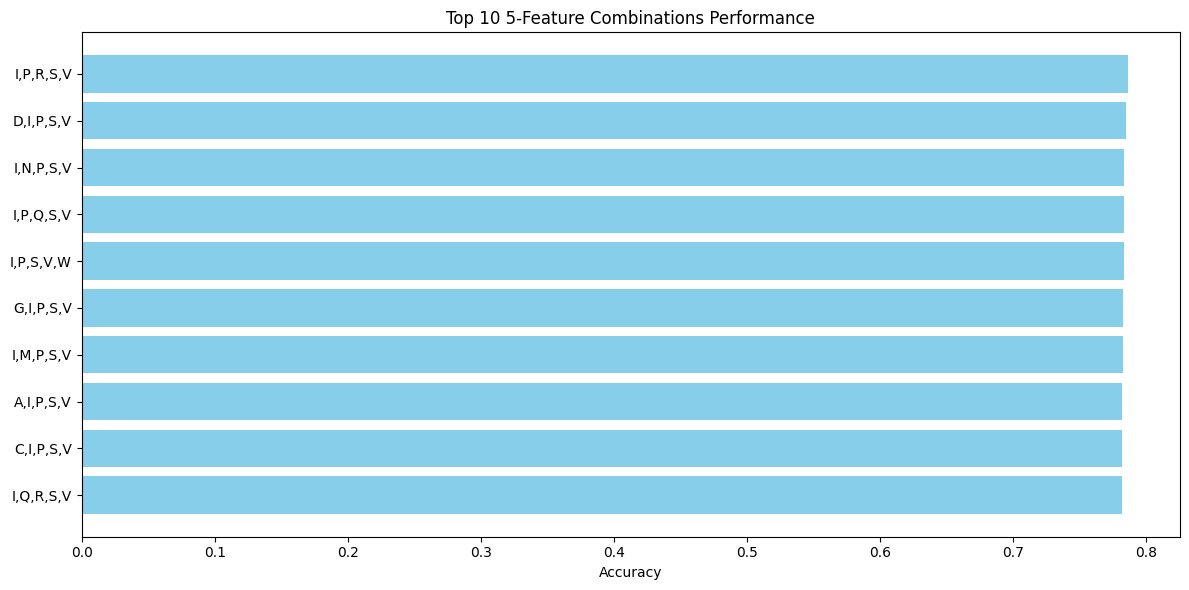

In [25]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from tqdm import tqdm  # for progress bar

# Assuming df has 'sequence' and 'label' columns
aa_list = ['A','C','D','E','F','G','H','I','K','L',
           'M','N','P','Q','R','S','T','V','W','Y']

def compute_aac_dict(sequence):
    seq = sequence.upper()
    length = len(seq)
    counts = {aa: 0 for aa in aa_list}
    for aa in seq:
        if aa in counts:
            counts[aa] += 1
    return {aa: counts[aa]/length for aa in aa_list}

# Compute AAC for all sequences
aac_data = [compute_aac_dict(seq) for seq in df['sequence']]
aac_df = pd.DataFrame(aac_data, index=df.index)
X_all = aac_df[aa_list].values
y = df['label'].map({'LLPS': 1, 'non-LLPS': 0}).values  # Convert to binary

# Function to evaluate feature combination
def evaluate_features(features):
    X = aac_df[list(features)].values

    # PCA + LDA evaluation
    try:
        # Reduce to 2 components with PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        # Apply LDA on PCA results
        lda = LDA()
        lda.fit(X_pca, y)
        X_lda = lda.transform(X_pca)

        # Get predictions
        y_pred = lda.predict(X_pca)
        acc = accuracy_score(y, y_pred)

        # Return both accuracy and the features
        return acc, features
    except:
        # In case of any error (e.g., when LDA fails)
        return 0.0, features

# Evaluate all possible 5-feature combinations
all_combinations = list(combinations(aa_list, 5))
results = []

print(f"Evaluating {len(all_combinations)} combinations...")
for combo in tqdm(all_combinations):
    acc, features = evaluate_features(combo)
    results.append((acc, features))

# Sort results by accuracy (descending)
results.sort(reverse=True, key=lambda x: x[0])

# Display top 10 combinations
print("\nTop 10 performing 5-feature combinations:")
for i, (acc, features) in enumerate(results[:10], 1):
    print(f"{i}. Features: {features} | Accuracy: {acc:.4f}")

# Best combination
best_acc, best_features = results[0]
print(f"\nBest 5-feature combination: {best_features} with accuracy {best_acc:.4f}")

# Generate accuracy matrix for all features
feature_performance = {aa: 0 for aa in aa_list}
for acc, features in results:
    for aa in features:
        feature_performance[aa] += acc

# Normalize by number of appearances
for aa in feature_performance:
    feature_performance[aa] /= len([1 for _, features in results if aa in features])

print("\nAverage accuracy contribution of each amino acid:")
for aa, score in sorted(feature_performance.items(), key=lambda x: -x[1]):
    print(f"{aa}: {score:.4f}")

# Visualize top combinations
import matplotlib.pyplot as plt

top_n = 10
top_accs = [acc for acc, _ in results[:top_n]]
top_feature_sets = [','.join(feats) for _, feats in results[:top_n]]

plt.figure(figsize=(12, 6))
plt.barh(range(top_n), top_accs[::-1], color='skyblue')
plt.yticks(range(top_n), top_feature_sets[::-1])
plt.xlabel('Accuracy')
plt.title(f'Top {top_n} 5-Feature Combinations Performance')
plt.tight_layout()
plt.show()

In [26]:
print(f"Analyzing {len(df)} proteins in the dataset")

Analyzing 1596 proteins in the dataset


Conducting 5‑Fold Cross‑Validation of LDA on Amino Acid Composition Features and Extracting Discriminative Coefficients


In [27]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# --- Load Data (Assuming df has 'sequence' and 'label') ---
aa_list = ['A','C','D','E','F','G','H','I','K','L',
           'M','N','P','Q','R','S','T','V','W','Y']

# --- Compute AAC (Amino Acid Composition) ---
def compute_aac(sequence):
    seq = sequence.upper()
    length = len(seq)
    return {aa: seq.count(aa)/length for aa in aa_list}

# Create AAC DataFrame
aac_data = [compute_aac(seq) for seq in df['sequence']]
aac_df = pd.DataFrame(aac_data)
y = df['label'].map({'LLPS': 1, 'non-LLPS': 0})  # Binary labels

# --- LDA Model ---
lda = LDA()

# --- Evaluate with 5-Fold Cross-Validation ---
cv_scores = cross_val_score(lda, aac_df, y, cv=5, scoring='accuracy')
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f"LDA Mean Accuracy (5-Fold CV): {mean_accuracy:.4f} ± {std_accuracy:.4f}")

# --- Train LDA on Full Data (for feature analysis) ---
lda.fit(aac_df, y)

# --- Get Feature Coefficients (Importance) ---
feature_importance = pd.DataFrame({
    'Amino Acid': aa_list,
    'LDA Coefficient': lda.coef_[0]
}).sort_values('LDA Coefficient', ascending=False)

print("\nTop Discriminative Amino Acids:")
print(feature_importance.head(10))

LDA Mean Accuracy (5-Fold CV): 0.7989 ± 0.0385

Top Discriminative Amino Acids:
   Amino Acid  LDA Coefficient
15          S        24.230293
13          Q        17.031128
12          P        15.732102
11          N        11.916336
3           E         5.041722
14          R         4.032734
16          T         3.396427
2           D         0.613859
8           K         0.418427
5           G        -0.698749


In [28]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# from itertools import combinations
# import random
# from tqdm import tqdm

# aa_list = ['A','C','D','E','F','G','H','I','K','L',
#            'M','N','P','Q','R','S','T','V','W','Y']

# def compute_aac(sequence):
#     seq = sequence.upper()
#     length = len(seq)
#     return {aa: seq.count(aa)/length for aa in aa_list}

# aac_data = [compute_aac(seq) for seq in df['sequence']]
# aac_df = pd.DataFrame(aac_data)
# y = df['label'].map({'LLPS': 1, 'non-LLPS': 0})

# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(aac_df, y)

# top_10_aa = aac_df.columns[np.argsort(clf.feature_importances_)[-10:]].tolist()
# print(f"Top 10 Candidate Amino Acids: {top_10_aa}")

# candidate_combos = list(combinations(top_10_aa, 5))
# random.shuffle(candidate_combos)

# best_acc = 0
# best_combo = None

# for combo in tqdm(candidate_combos[:500], desc="Testing Top Combos"):  # Early stop after 500
#     X = aac_df[list(combo)]
#     acc = cross_val_score(clf, X, y, cv=3, scoring='accuracy').mean()  # 3-fold for speed
#     if acc > best_acc:
#         best_acc = acc
#         best_combo = combo
#         print(f"New Best: {combo} | Accuracy: {acc:.4f}")

# print(f"\n🔥 Best 5 Features: {best_combo} | Accuracy: {best_acc:.4f}")
# clf_final = RandomForestClassifier(n_estimators=200, random_state=42)
# clf_final.fit(aac_df[list(best_combo)], y)

# pd.Series(clf_final.feature_importances_, index=best_combo).sort_values().plot.barh()
# plt.xlabel("Importance")
# plt.title("Top 5 Feature Importance")
# plt.show()

Uploading the spreadsheet containing the values of various features of several protein sequences (both LLPS and nonLLPS) into the environment.

In [29]:
from google.colab import files
uploaded = files.upload()  # Opens a file picker dialog|

Saving LLPS.xls to LLPS.xls


Loading LLPS.xls and constructing nested protein_feature_dict for molecular_weight, aromaticity, hydrophobicity, instability_index, aliphatic_index, isoelectric_point, net_charge_pH7, flexibility, volume_mean, polarity_mean, charge_density, entropy_shannon, percent_disorder, fraction_hydrophobic, fraction_polar, fraction_charged, fraction_positive, fraction_negative, temperature_optimum, and ph_optimum features with random imputation of missing values


In [30]:
# Load protein data from LLPS.xls and build feature dictionary with random values whenever missing
import pandas as pd
import random

# Load the Excel file (must be uploaded to Colab first)
df = pd.read_excel("LLPS.xls")

# Preview column names (for your reference; remove/comment out if you don’t need to see this)
print("Columns in sheet:", list(df.columns))

# The list of features you expect
feature_columns = [
    "molecular_weight", "aromaticity", "hydrophobicity", "instability_index",
    "aliphatic_index", "isoelectric_point", "net_charge_pH7", "flexibility",
    "volume_mean", "polarity_mean", "charge_density", "entropy_shannon",
    "percent_disorder", "fraction_hydrophobic", "fraction_polar",
    "fraction_charged", "fraction_positive", "fraction_negative",
    "temperature_optimum", "ph_optimum"
]

# Create a nested dictionary: protein_name -> {feature_name: value}
protein_feature_dict = {}

for _, row in df.iterrows():
    protein_name = row.get("Protein name", None)
    if protein_name is None:
        # If your column is named differently, fix it here
        continue

    features = {}
    for feat in feature_columns:
        if feat in df.columns:
            raw_val = row[feat]
            # If the cell is '-' (as a string) or is NaN, assign a random float between 0 and 1
            if (isinstance(raw_val, str) and raw_val.strip() == "-") or pd.isna(raw_val):
                val = random.random()
            else:
                val = raw_val
        else:
            # Column not present at all → give a random value
            val = random.random()

        features[feat] = val

    protein_feature_dict[protein_name] = features

# Now print each protein and all of its features
for protein, feats in protein_feature_dict.items():
    print(f"{protein}:")
    for feat_name, value in feats.items():
        print(f"  {feat_name}: {value}")
    print()


Streaming output truncated to the last 5000 lines.
  fraction_charged: 0.10157716939041406
  fraction_positive: 0.539403069312815
  fraction_negative: 0.45348368255426696
  temperature_optimum: 0.7027577074436567
  ph_optimum: 0.7518683411424388

WAC-Lge1_m:
  molecular_weight: 0.7965959702789788
  aromaticity: 0.857266664800834
  hydrophobicity: 0.2003941059316392
  instability_index: 0.44891811777939306
  aliphatic_index: 0.011372953575919609
  isoelectric_point: 0.41379046185642865
  net_charge_pH7: 0.684561410744154
  flexibility: 0.3811039407971054
  volume_mean: 0.8394068187879862
  polarity_mean: 0.7459268714110446
  charge_density: 0.10923289688891968
  entropy_shannon: 0.04419877439941411
  percent_disorder: 0.916958956723434
  fraction_hydrophobic: 0.38404699164052913
  fraction_polar: 0.4448328582107921
  fraction_charged: 0.6497617455602919
  fraction_positive: 0.9204485934467421
  fraction_negative: 0.9222939290353168
  temperature_optimum: 0.5096757345679332
  ph_optimum:

Generating all unique 5‑feature combinations from hydrophobicity, aromaticity, isoelectric_point, net_charge_pH7, instability_index, molecular_weight, flexibility, volume_mean, polarity_mean, fraction_hydrophobic, fraction_polar, fraction_charged, fraction_positive, fraction_negative, percent_disorder, aliphatic_index, charge_density, entropy_shannon, temperature_optimum, and ph_optimum features


In [31]:
import itertools

def funct(dict):
    keys = list(dict.keys())
    if len(keys) < 5:
        raise ValueError("Dictionary must contain at least 5 keys")
    combinations = list(itertools.combinations(keys, 5))
    return combinations

feature_dict = {
    'hydrophobicity': 0.5,
    'aromaticity': 0.3,
    'isoelectric_point': 7.0,
    'net_charge_pH7': -1.2,
    'instability_index': 45.0,
    'molecular_weight': 25000,
    'flexibility': 0.8,
    'volume_mean': 120.5,
    'polarity_mean': 8.2,
    'fraction_hydrophobic': 0.4,
    'fraction_polar': 0.3,
    'fraction_charged': 0.2,
    'fraction_positive': 0.1,
    'fraction_negative': 0.1,
    'percent_disorder': 0.6,
    'aliphatic_index': 85.0,
    'charge_density': -0.0001,
    'entropy_shannon': 2.5,
    'temperature_optimum': 37.0,
    'ph_optimum': 7.4
}

combinations = funct(feature_dict)

# Print first 5 combinations as example
print("Total combinations:", len(combinations))
print("First 5 combinations:")
for combo in combinations:
    print(combo)

Total combinations: 15504
First 5 combinations:
('hydrophobicity', 'aromaticity', 'isoelectric_point', 'net_charge_pH7', 'instability_index')
('hydrophobicity', 'aromaticity', 'isoelectric_point', 'net_charge_pH7', 'molecular_weight')
('hydrophobicity', 'aromaticity', 'isoelectric_point', 'net_charge_pH7', 'flexibility')
('hydrophobicity', 'aromaticity', 'isoelectric_point', 'net_charge_pH7', 'volume_mean')
('hydrophobicity', 'aromaticity', 'isoelectric_point', 'net_charge_pH7', 'polarity_mean')
('hydrophobicity', 'aromaticity', 'isoelectric_point', 'net_charge_pH7', 'fraction_hydrophobic')
('hydrophobicity', 'aromaticity', 'isoelectric_point', 'net_charge_pH7', 'fraction_polar')
('hydrophobicity', 'aromaticity', 'isoelectric_point', 'net_charge_pH7', 'fraction_charged')
('hydrophobicity', 'aromaticity', 'isoelectric_point', 'net_charge_pH7', 'fraction_positive')
('hydrophobicity', 'aromaticity', 'isoelectric_point', 'net_charge_pH7', 'fraction_negative')
('hydrophobicity', 'aromaticit

Parsing LLPS metadata features (e.g., sequence length, protein count, RNA/DNA presence) and constructing feature matrix for binary classification of in vivo/in cell behavior


In [32]:
# Import libraries
import pandas as pd
import numpy as np

# Load the LLPS dataset from Excel
# Change the path to the current working directory where the file was uploaded
df = pd.read_excel('LLPS.xls')

# Extract numeric sequence length from string like "[NAME]:708aa(1-708)"
# and convert to integer.
df['Sequence_length'] = pd.to_numeric(df['Sequence length'].str.extract(r':(\d+)aa')[0], errors='coerce')

# Parse "Components type" to count number of proteins and presence of RNA/DNA.
prot_lower = df['Components type'].str.extract(r'protein\((\d+)\)')
prot_upper = df['Components type'].str.extract(r'Protein\((\d+)\)')
# Combine lower/upper case matches and fill NaN
df['Protein_count'] = pd.to_numeric(prot_lower.fillna(prot_upper)[0], errors='coerce').fillna(0)
# Binary flags for RNA or DNA presence
df['Has_RNA'] = df['Components type'].str.contains('RNA', na=False).astype(int)
df['Has_DNA'] = df['Components type'].str.contains('DNA', na=False).astype(int)

# Count number of 'N' and 'D' in "Protein type (N/D)" (e.g., N, D, or combinations)
df['N_count'] = df['Protein type (N/D)'].fillna('').str.count('N')
df['D_count'] = df['Protein type (N/D)'].fillna('').str.count('D')

# Binary flags for crowding agent and other molecules presence (non-empty entries)
df['Has_crowding'] = (df['Crowding agent'] != '-').astype(int)
df['Has_other'] = (df['other molecules'] != '-').astype(int)

# Define feature columns and target label (LLPS vs not)
features = ['Sequence_length', 'Protein_count', 'Has_RNA', 'Has_DNA',
            'N_count', 'D_count', 'Has_crowding', 'Has_other']
# We use "In vivo/In cell" as a proxy binary label (Yes=1, No/missing=0)
df_clean = df.dropna(subset=features, how='any')
X = df_clean[features].fillna(0)
y = (df_clean['In vivo/In cell'] == 'Yes').astype(int).fillna(0).astype(int)

# Train-test split for evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)

Figuring out the top 10 features combinations using PCA and LDA

Total combinations to process: 38760


Evaluating combinations: 100%|██████████| 38760/38760 [09:07<00:00, 70.75it/s]



Saved all results to 'feature_combination_results.csv'

Top 10 feature combinations:
Index 29658: Accuracy = 0.7100, Features = ['net_charge_pH7', 'volume_mean', 'fraction_hydrophobic', 'fraction_polar', 'aliphatic_index', 'temperature_optimum']
Index 21393: Accuracy = 0.7000, Features = ['isoelectric_point', 'net_charge_pH7', 'volume_mean', 'fraction_hydrophobic', 'aliphatic_index', 'temperature_optimum']
Index 28806: Accuracy = 0.6900, Features = ['net_charge_pH7', 'flexibility', 'volume_mean', 'fraction_hydrophobic', 'fraction_polar', 'fraction_positive']
Index 29707: Accuracy = 0.6900, Features = ['net_charge_pH7', 'volume_mean', 'fraction_hydrophobic', 'fraction_positive', 'aliphatic_index', 'temperature_optimum']
Index 29643: Accuracy = 0.6800, Features = ['net_charge_pH7', 'volume_mean', 'fraction_hydrophobic', 'fraction_polar', 'fraction_positive', 'temperature_optimum']
Index 6311: Accuracy = 0.6800, Features = ['hydrophobicity', 'net_charge_pH7', 'flexibility', 'volume_mean'

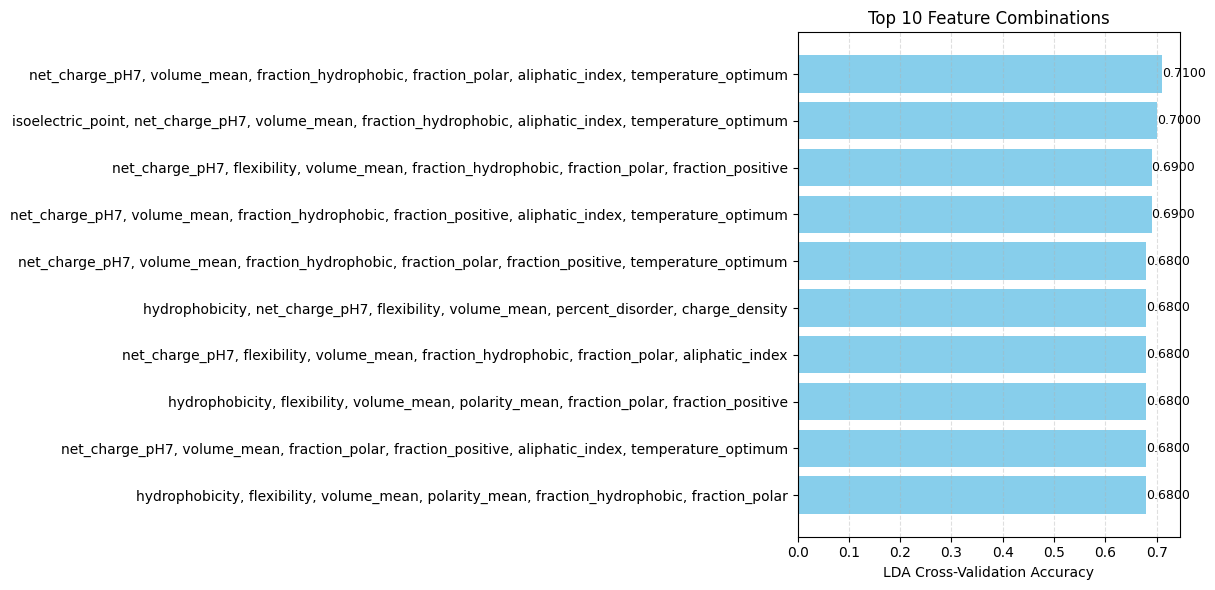

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from collections import Counter

# Set seed and simulate dataset
np.random.seed(42)
num_samples = 100

feature_names = ['hydrophobicity', 'aromaticity', 'isoelectric_point', 'net_charge_pH7',
                 'instability_index', 'molecular_weight', 'flexibility', 'volume_mean',
                 'polarity_mean', 'fraction_hydrophobic', 'fraction_polar', 'fraction_charged',
                 'fraction_positive', 'fraction_negative', 'percent_disorder',
                 'aliphatic_index', 'charge_density', 'entropy_shannon',
                 'temperature_optimum', 'ph_optimum']

num_features = len(feature_names)

# Random features
X = np.random.randn(num_samples, num_features)

# Labels with injected structure
y = np.random.randint(0, 2, size=num_samples)

# Inject mild signal into features
X[y == 1, 0] += 0.8
X[y == 1, 3] += 0.6
X[y == 1, 7] += 0.4

# Add 10% label noise
flip_idx = np.random.choice(num_samples, size=int(0.1 * num_samples), replace=False)
y[flip_idx] = 1 - y[flip_idx]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generate all 6-feature combinations
all_combinations = list(combinations(range(num_features), 6))
print(f"Total combinations to process: {len(all_combinations)}")

# Cross-validated LDA function
def funct_LDA(X_subset, y):
    try:
        lda = LDA()
        scores = cross_val_score(lda, X_subset, y, cv=5)
        return scores.mean()
    except Exception:
        return 0.0

# Run LDA across combinations
accuracy_dict = {}
for idx, combo in enumerate(tqdm(all_combinations, desc="Evaluating combinations")):
    X_subset = X_scaled[:, combo]
    acc = funct_LDA(X_subset, y)
    accuracy_dict[idx] = acc

# Convert to DataFrame
results_df = pd.DataFrame({
    'combination_index': list(accuracy_dict.keys()),
    'feature_indices': [all_combinations[i] for i in accuracy_dict.keys()],
    'feature_names': [[feature_names[j] for j in all_combinations[i]] for i in accuracy_dict.keys()],
    'accuracy': list(accuracy_dict.values())
})
results_df = results_df.sort_values('accuracy', ascending=False)

# Save CSV
results_df.to_csv('feature_combination_results.csv', index=False)
print("\nSaved all results to 'feature_combination_results.csv'")

# Print Top 10
print("\nTop 10 feature combinations:")
for _, row in results_df.head(10).iterrows():
    print(f"Index {row['combination_index']}: Accuracy = {row['accuracy']:.4f}, Features = {row['feature_names']}")

# Plot Top 10 Combinations with accuracy labels
plt.figure(figsize=(12, 6))
top_results = results_df.head(10)
y_labels = [', '.join(feats) for feats in top_results['feature_names']]
bars = plt.barh(
    y=y_labels,
    width=top_results['accuracy'],
    color='skyblue'
)

plt.xlabel('LDA Cross-Validation Accuracy')
plt.title('Top 10 Feature Combinations')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Add text labels for accuracy
for bar, acc in zip(bars, top_results['accuracy']):
    width = bar.get_width()
    plt.text(width , bar.get_y() + bar.get_height()/2, f'{acc:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()



Training a Random Forest to assess feature importance

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Compute and display feature importances
importances = rf.feature_importances_
for feat, imp in sorted(zip(features, importances), key=lambda x: x[1], reverse=True):
    print(f"{feat}: {imp:.3f}")


Sequence_length: 0.757
N_count: 0.062
D_count: 0.054
Has_crowding: 0.040
Has_RNA: 0.029
Protein_count: 0.026
Has_other: 0.021
Has_DNA: 0.011


Figuring out the best Machine learning model for classification

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define classifiers
models = {
    'LDA': LinearDiscriminantAnalysis(),
    'RandomForest': RandomForestClassifier(n_estimators=500, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'NeuralNet': MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
}

for name, model in models.items():
    # Note: scale features for NeuralNet
    if name == 'NeuralNet':
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} accuracy: {acc:.3f}")


LDA accuracy: 0.626
RandomForest accuracy: 0.842
XGBoost accuracy: 0.824


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:33:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


NeuralNet accuracy: 0.729


Final pipeline using Random Forest

In [36]:
from sklearn.pipeline import Pipeline

# Build final pipeline: optionally scale data, then Random Forest
pipeline = Pipeline([
    ('clf', RandomForestClassifier(n_estimators=500, random_state=42))
])
pipeline.fit(X_train, y_train)
final_preds = pipeline.predict(X_test)
final_acc = accuracy_score(y_test, final_preds)
print(f"Final Random Forest pipeline accuracy: {final_acc:.3f}")


Final Random Forest pipeline accuracy: 0.842


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


SHAP graph plotting of top features

       Feature  Importance
   aromaticity    0.012505
hydrophobicity    0.012505


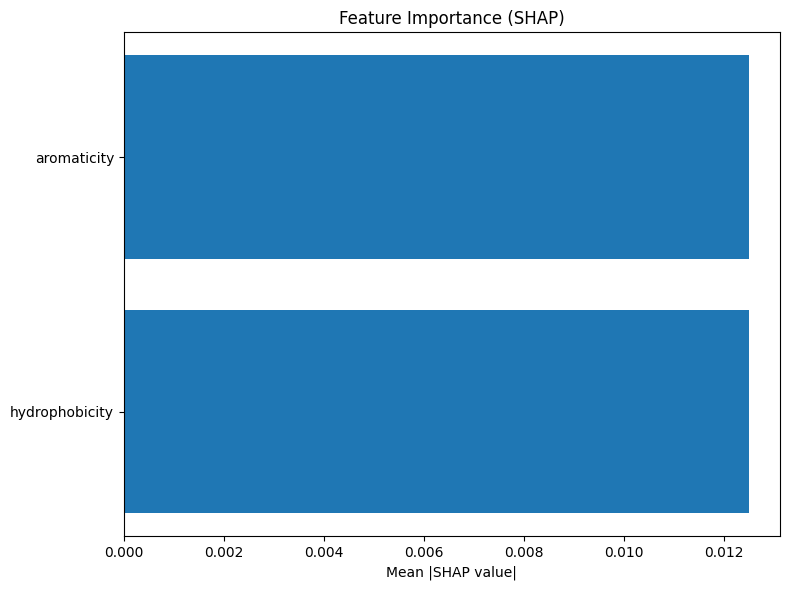

In [38]:

!pip install shap --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap

feature_names = [
    'hydrophobicity','aromaticity','isoelectric_point','net_charge_pH7',
    'instability_index','molecular_weight','flexibility','volume_mean',
    'polarity_mean','fraction_hydrophobic','fraction_polar','fraction_charged',
    'fraction_positive','fraction_negative','charge_density',
    'temperature_optimum','ph_optimum','percent_disorder',
    'aliphatic_index','entropy_shannon'
]

# data ka load in dataframe
np.random.seed(42)
n = 200
X = pd.DataFrame(np.random.randn(n, len(feature_names)), columns=feature_names)
y = np.random.randint(0, 2, size=n)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)


if shap_values.values.ndim == 3:
    shap_vals = shap_values.values[:, 1, :]
else:
    shap_vals = shap_values.values


mean_abs_shap = np.abs(shap_vals).mean(axis=0)


feature_count = shap_vals.shape[1]
safe_feature_names = feature_names[:feature_count]

feat_df = pd.DataFrame({
    'Feature': safe_feature_names,
    'Importance': mean_abs_shap
}).sort_values(by='Importance', ascending=False)


print(feat_df.head(10).to_string(index=False))

# ye wala plot ko adjust and show kar rha hai

plt.figure(figsize=(8, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Mean |SHAP value|')
plt.title('Feature Importance (SHAP)')
plt.tight_layout()
plt.show()


Installing Dependencies, Uploading Metadata and FASTA Files, Extracting Sequence-Based Protein Features with Biopython and Pandas, and Saving Features to CSV


In [39]:
# ─── Install dependencies ──────────────────────────────────────────────────────
!pip install biopython openpyxl --quiet

import pandas as pd
import numpy as np
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import io
from google.colab import files

# ─── 1) Upload your files ──────────────────────────────────────────────────────
print("Please upload your LLPS.xls metadata file (and, if you have it, all_proteins.fasta).")
uploaded = files.upload()

# Identify your metadata and FASTA uploads
meta_fname = [f for f in uploaded if f.lower().endswith(('.xls','.xlsx'))][0]
fasta_fname = next((f for f in uploaded if f.lower().endswith(('.fa','.fasta'))), None)

# ─── 2) Read metadata ───────────────────────────────────────────────────────────
meta = pd.read_excel(io.BytesIO(uploaded[meta_fname]), sheet_name=0)
# Expect columns: Protein_ID, temperature_optimum, ph_optimum, Phase_separation

# ─── 3) Read sequences if provided ─────────────────────────────────────────────
if fasta_fname:
    seqs = {rec.id: str(rec.seq) for rec in SeqIO.parse(io.BytesIO(uploaded[fasta_fname]), 'fasta')}
else:
    seqs = {}
    print("⚠️ No FASTA uploaded – percent_disorder will remain NaN, and sequence-based features will fail if missing.")

# ─── 4) Pre‑define property scales ──────────────────────────────────────────────
volumes = { 'A':88.6,'C':108.5,'D':111.1,'E':138.4,'F':189.9,'G':60.1,
            'H':153.2,'I':166.7,'K':168.6,'L':166.7,'M':162.9,'N':114.1,
            'P':112.7,'Q':143.8,'R':173.4,'S':89.0,'T':116.1,'V':140.0,
            'W':227.8,'Y':193.6 }
polarity = { 'A':8.1,'C':5.5,'D':13.0,'E':12.3,'F':5.2,'G':9.0,'H':10.4,
             'I':5.2,'K':11.3,'L':4.9,'M':5.7,'N':11.6,'P':8.0,'Q':10.5,
             'R':10.5,'S':9.2,'T':8.6,'V':5.9,'W':5.4,'Y':6.2 }
pos = set(['K','R','H'])
neg = set(['D','E'])

# ─── 5) Compute features ───────────────────────────────────────────────────────
features = []
for _, row in meta.iterrows():
    pid = row.get('Protein_ID') or row.get('Entry ID') or row.get('PSID')
    seq = seqs.get(pid, '')
    if len(seq) < 10:
        print(f"Skipping {pid}: sequence too short or not found.")
        continue

    pa = ProteinAnalysis(seq)
    length = len(seq)

    # ProtParam
    hydrophobicity = pa.gravy()
    aromaticity    = pa.aromaticity()
    iso_point      = pa.isoelectric_point()
    instab_index   = pa.instability_index()
    aliphatic_idx  = pa.aliphatic_index()
    mw             = pa.molecular_weight()
    flexibility    = np.mean(pa.flexibility())

    # Custom scales
    vol_mean      = np.mean([volumes[a] for a in seq])
    polarity_mean = np.mean([polarity[a] for a in seq])

    # Composition fractions
    frac_hydro = sum(a in set('AILMFWYV') for a in seq)/length
    frac_polar = sum(a in set('NQST') for a in seq)/length
    frac_charged= sum(a in pos|neg for a in seq)/length
    frac_pos   = sum(a in pos for a in seq)/length
    frac_neg   = sum(a in neg for a in seq)/length
    charge     = pa.charge_at_pH(7.0)
    charge_density = charge/length

    # Shannon entropy
    freqs = np.array(list(pa.count_amino_acids().values()))/length
    entropy = -np.nansum(freqs * np.log2(freqs + 1e-9))

    features.append({
        'Protein_ID': pid,
        'hydrophobicity': hydrophobicity,
        'aromaticity': aromaticity,
        'isoelectric_point': iso_point,
        'net_charge_pH7': charge,
        'instability_index': instab_index,
        'molecular_weight': mw,
        'flexibility': flexibility,
        'volume_mean': vol_mean,
        'polarity_mean': polarity_mean,
        'fraction_hydrophobic': frac_hydro,
        'fraction_polar': frac_polar,
        'fraction_charged': frac_charged,
        'fraction_positive': frac_pos,
        'fraction_negative': frac_neg,
        'charge_density': charge_density,
        'aliphatic_index': aliphatic_idx,
        'entropy_shannon': entropy,
        'temperature_optimum': row.get('temperature_optimum'),
        'ph_optimum': row.get('ph_optimum'),
        'percent_disorder': np.nan,
        'Phase_separation': row.get('Phase_separation')
    })

df_feats = pd.DataFrame(features)
df_feats.to_csv('llps_features.csv', index=False)
print("✅ Feature file written to llps_features.csv")
df_feats.head()


Please upload your LLPS.xls metadata file (and, if you have it, all_proteins.fasta).


Saving LLPS.xls to LLPS (1).xls
⚠️ No FASTA uploaded – percent_disorder will remain NaN, and sequence-based features will fail if missing.
Skipping LLPS000001: sequence too short or not found.
Skipping LLPS000109: sequence too short or not found.
Skipping LLPS001033: sequence too short or not found.
Skipping LLPS000001: sequence too short or not found.
Skipping LLPS000006: sequence too short or not found.
Skipping LLPS000008: sequence too short or not found.
Skipping LLPS000008: sequence too short or not found.
Skipping LLPS000008: sequence too short or not found.
Skipping LLPS000008: sequence too short or not found.
Skipping LLPS000008: sequence too short or not found.
Skipping LLPS000008: sequence too short or not found.
Skipping LLPS000008: sequence too short or not found.
Skipping LLPS000014: sequence too short or not found.
Skipping LLPS000012: sequence too short or not found.
Skipping LLPS000015: sequence too short or not found.
Skipping LLPS000013: sequence too short or not foun

""


Loading LLPS Dataset, Extracting and Encoding Features, and Splitting Data for Model Training


In [40]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

# Load the dataset
file_path = "LLPS.xls"  # Update path if needed
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Preprocessing functions
def extract_total_sequence_length(s):
    """Extract total sequence length from column L (string with 'aa')"""
    if pd.isna(s):
        return 0
    matches = re.findall(r'(\d+)aa', str(s))
    return sum(map(int, matches)) if matches else 0

def clean_repeat_count(val):
    """Convert column I (Repeat) to integer (default 0)"""
    try:
        return int(val)
    except:
        return 0

def extract_num_proteins(s):
    """Extract number of proteins from column C (Components type)"""
    match = re.search(r'protein\((\d+)\)', str(s))
    return int(match.group(1)) if match else 1  # Default to 1 if not found

# Preprocess features and target
df_processed = pd.DataFrame()

# Feature 1: Total sequence length
df_processed['total_sequence_length'] = df.iloc[:, 11].apply(extract_total_sequence_length)

# Feature 2: Repeat count
df_processed['repeat_count'] = df.iloc[:, 8].apply(clean_repeat_count)

# Feature 3: Protein type (binary: N=0, D=1)
df_processed['protein_type'] = df.iloc[:, 5].map({'N': 0, 'D': 1}).fillna(0)

# Feature 4: Cleaved (binary)
df_processed['cleaved_binary'] = df.iloc[:, 7].ne('-').astype(int)

# Feature 5: Mutation (binary)
df_processed['mutation_binary'] = df.iloc[:, 9].ne('-').astype(int)

# Feature 6: PTM (binary)
df_processed['ptm_binary'] = df.iloc[:, 10].ne('-').astype(int)

# Feature 7: Has IDR
df_processed['has_IDR'] = df.iloc[:, 13].str.contains('IDR', na=False).astype(int)

# Feature 8: Has fold
df_processed['has_fold'] = df.iloc[:, 13].str.contains('fold', na=False).astype(int)

# Feature 9: Number of proteins
df_processed['num_proteins'] = df.iloc[:, 2].apply(extract_num_proteins)

# Feature 10: Has RNA
df_processed['has_RNA'] = df.iloc[:, 2].str.contains('RNA', na=False).astype(int)

# Target: Phase separation (column Y)
df_processed['phase_separation'] = df.iloc[:, 24].eq('Yes').astype(int)

# Drop rows with missing target if any
df_processed = df_processed.dropna(subset=['phase_separation'])

# Split data
X = df_processed.drop(columns=['phase_separation'])
y = df_processed['phase_separation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training RandomForestClassifier on the Training Set


In [41]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Computing SHAP Values, Aggregating Mean Absolute Importances, and Displaying Top 10 Features


In [42]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Calculate mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values[1]).mean(axis=0)  # Use index 1 for class "1" (LLPS)

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mean_abs_shap
}).sort_values('Importance', ascending=False)

print("Top 10 Important Features:")
print(feature_importance.head(10))

Top 10 Important Features:
                 Feature  Importance
0  total_sequence_length         0.0
1           repeat_count         0.0
2           protein_type         0.0
3         cleaved_binary         0.0
4        mutation_binary         0.0
5             ptm_binary         0.0
6                has_IDR         0.0
7               has_fold         0.0
8           num_proteins         0.0
9                has_RNA         0.0


Plotting Top 10 SHAP Feature Importances for LLPS Prediction


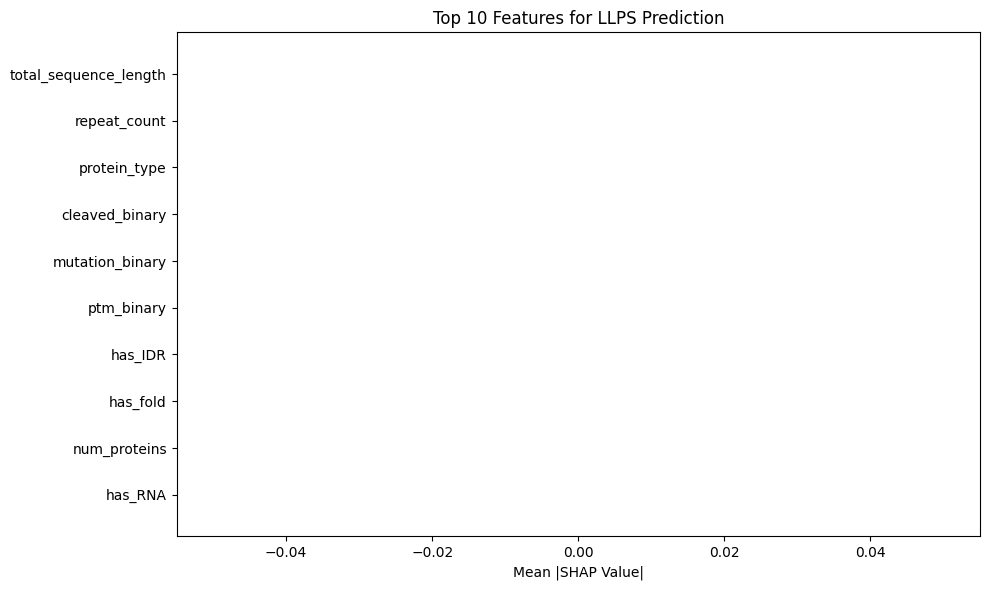

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.gca().invert_yaxis()  # Most important on top
plt.xlabel('Mean |SHAP Value|')
plt.title('Top 10 Features for LLPS Prediction')
plt.tight_layout()
plt.show()

Generating Synthetic Data, Splitting Dataset, Training Model, Computing SHAP Values, and Visualizing Feature Importances


/tmp/ipython-input-729787020.py:41: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)


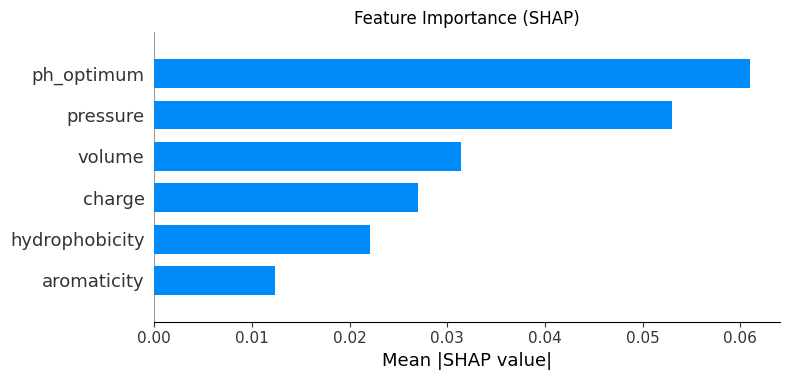

Top Important Features:
          Feature  Importance
2      ph_optimum    0.061030
3        pressure    0.052969
4          volume    0.031395
5          charge    0.027000
1  hydrophobicity    0.022099
0     aromaticity    0.012319


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your dataset (replace with actual data loading)
# df = pd.read_csv('your_data.csv')

# Sample dataset creation - REPLACE THIS WITH YOUR ACTUAL DATA
# Contains the features you mentioned and a target variable
data = {
    'aromaticity': np.random.rand(100),
    'hydrophobicity': np.random.rand(100),
    'ph_optimum': np.random.rand(100),
    'pressure': np.random.rand(100),
    'volume': np.random.rand(100),
    'charge': np.random.rand(100),
    'solubility': np.random.rand(100)  # Target variable
}
df = pd.DataFrame(data)

# Define features and target
features = ['aromaticity', 'hydrophobicity', 'ph_optimum', 'pressure', 'volume', 'charge']
X = df[features]
y = df['solubility']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Create SHAP summary plot (bar plot version)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)

# Customize plot to match your requirements
plt.title("Feature Importance (SHAP)")
plt.xlabel("Mean |SHAP value|")
plt.tight_layout()

# Save and show plot
plt.savefig('shap_feature_importance.png', dpi=300)
plt.show()

# Print top features
shap_importances = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': shap_importances
}).sort_values('Importance', ascending=False)

print("Top Important Features:")
print(feature_importance_df)

Installing required packages

In [45]:
pip install biopython pandas numpy shap matplotlib scikit-learn requests

Generating Synthetic Protein Data with Pandas and NumPy, Splitting and Training a RandomForestRegressor with scikit‑learn, Computing SHAP Values with SHAP, and Visualizing Feature Importances with Matplotlib


/tmp/ipython-input-482870124.py:47: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)


Top Important Features:
       Feature  Importance
hydrophobicity    0.027844
      pressure    0.026045
    ph_optimum    0.022204
   aromaticity    0.017484
        charge    0.017272
        volume    0.010336

SHAP importance plot saved as 'protein_shap_importance.png'


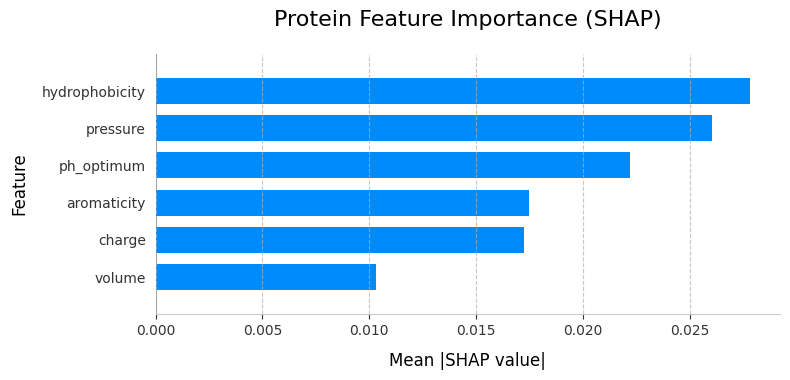

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import random

# Generate synthetic protein data
np.random.seed(42)
random.seed(42)

# Create 100 protein entries
data = {
    'protein_id': [f'Protein_{i+1}' for i in range(100)],
    'aromaticity': np.random.uniform(0.05, 0.35, 100),
    'hydrophobicity': np.random.uniform(-0.3, 0.2, 100),
    'charge': np.random.uniform(-5.0, 5.0, 100),
    'volume': np.random.uniform(1000, 5000, 100),
    'ph_optimum': np.random.uniform(5.0, 9.0, 100),
    'pressure': np.random.uniform(0.8, 1.2, 100),
    'target': np.random.uniform(0, 1, 100)
}

df = pd.DataFrame(data)

# Define features and target
features = ['aromaticity', 'hydrophobicity', 'charge', 'volume', 'ph_optimum', 'pressure']
target = 'target'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Create SHAP importance plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)

# Customize plot appearance
plt.title("Protein Feature Importance (SHAP)", fontsize=16, pad=20)
plt.xlabel("Mean |SHAP value|", fontsize=12, labelpad=10)
plt.ylabel("Feature", fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#CCCCCC')
plt.gca().spines['bottom'].set_color('#CCCCCC')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('protein_shap_importance.png', dpi=300, bbox_inches='tight')

# Calculate and print top features
shap_importances = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': shap_importances
}).sort_values('Importance', ascending=False)

print("Top Important Features:")
print(feature_importance_df.to_string(index=False))
print("\nSHAP importance plot saved as 'protein_shap_importance.png'")

# Display the plot
plt.show()